# Exploratory Data Analysis-14
https://drive.google.com/file/d/1Viq2kLIAuS4QksqMrBN-Ywsrq0s-iyuC/view?usp=sharing

In [ ]:
# # Shape of the dataset
# df.shape

# # Checking noise values
# for i in df.columns:
#     print(i,'\n', df[i].sort_values().unique())
    
# # Checking null values
# df.isnull().sum()

# # Checking duplicates
# df[df.duplicated()==True]

# # Checking data types
# df.dtypes

# # 5-point summary
# df.describe()

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the dataset
df=pd.read_csv('E:/Exploratory_Data_Analysis/EDA_14_GlobalMissingMigrants.csv')

In [107]:
df.head(3)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Month
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,1
1,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.59713, -111.73756",Northern America,1
2,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,0,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.94026, -113.01125",Northern America,1


In [24]:
# Replace the space with '_', and change its cases to lower

# for i in df.columns:
#     x=i.lower()
#     x=x.replace(' ', '_')
#     print(x)

# def column_operation(x):
#     a=x.lower()
#     res=a.replace(' ', '_')
#     return res
# df.columns = df.columns.map(column_operation)
# df.columns


In [4]:
# Checking unique values of columns
for i in df.columns:
    print(i, '\n', df[i].sort_values().unique())

Incident Type 
 ['Cumulative Incident' 'Incident' 'Incident,Split Incident'
 'Split Incident']
Incident year 
 [2014 2015 2016 2017 2018 2019 2020 2021 2022 2023]
Reported Month 
 ['April' 'August' 'December' 'February' 'January' 'July' 'June' 'March'
 'May' 'November' 'October' 'September']
Region of Origin 
 ['Caribbean' 'Caribbean (P)' 'Central America' 'Central America (P)'
 'Central Asia' 'Eastern Africa' 'Eastern Africa (P)' 'Eastern Asia'
 'Eastern Asia (P)' 'Europe' 'Latin America / Caribbean (P)'
 'Middle Africa' 'Mixed' 'Northern Africa' 'Northern Africa (P)'
 'Northern America' 'Oceania' 'South America' 'South America (P)'
 'South-eastern Asia' 'South-eastern Asia (P)' 'Southern Africa'
 'Southern Asia' 'Southern Asia (P)' 'Sub-Saharan Africa'
 'Sub-Saharan Africa (P)' 'Unknown' 'Western / Southern Asia'
 'Western / Southern Asia (P)' 'Western Africa' 'Western Africa (P)'
 'Western Asia' 'Western Asia (P)' nan]
Region of Incident 
 ['Caribbean' 'Central America' 'Central Asi

In [5]:
# 1.	How many rows and columns are there in the dataset?
df.shape

(13020, 19)

In [6]:
# 2.	What are the data types of each column?
df.dtypes

Incident Type                           object
Incident year                            int64
Reported Month                          object
Region of Origin                        object
Region of Incident                      object
Country of Origin                       object
Number of Dead                         float64
Minimum Estimated Number of Missing      int64
Total Number of Dead and Missing         int64
Number of Survivors                      int64
Number of Females                        int64
Number of Males                          int64
Number of Children                       int64
Cause of Death                          object
Migration route                         object
Location of death                       object
Information Source                      object
Coordinates                             object
UNSD Geographical Grouping              object
dtype: object

In [14]:
# 3.	Are there any missing values in the dataset? If yes, handle them appropriately.
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i, '-',df[i].dtypes, '-', df[i].isnull().sum(), '-', round(((df[i].isnull().sum())/df.shape[0])*100, 2))

Coordinates - object - 36 - 0.28


In [9]:
# Getting value_counts of columns having null values
for i in df.columns:
    if df[i].isnull().sum()>0:
        print(i,'-', df[i].nunique())

Region of Origin - 33
Country of Origin - 335
Number of Dead - 86
Migration route - 25
Information Source - 3803
Coordinates - 9582
UNSD Geographical Grouping - 19


In [10]:
# df separation 
df_num=df.select_dtypes(exclude='object')
df_cat=df.select_dtypes(include='object')

In [11]:
df_cat.columns

Index(['Incident Type', 'Reported Month', 'Region of Origin',
       'Region of Incident', 'Country of Origin', 'Cause of Death',
       'Migration route', 'Location of death', 'Information Source',
       'Coordinates', 'UNSD Geographical Grouping'],
      dtype='object')

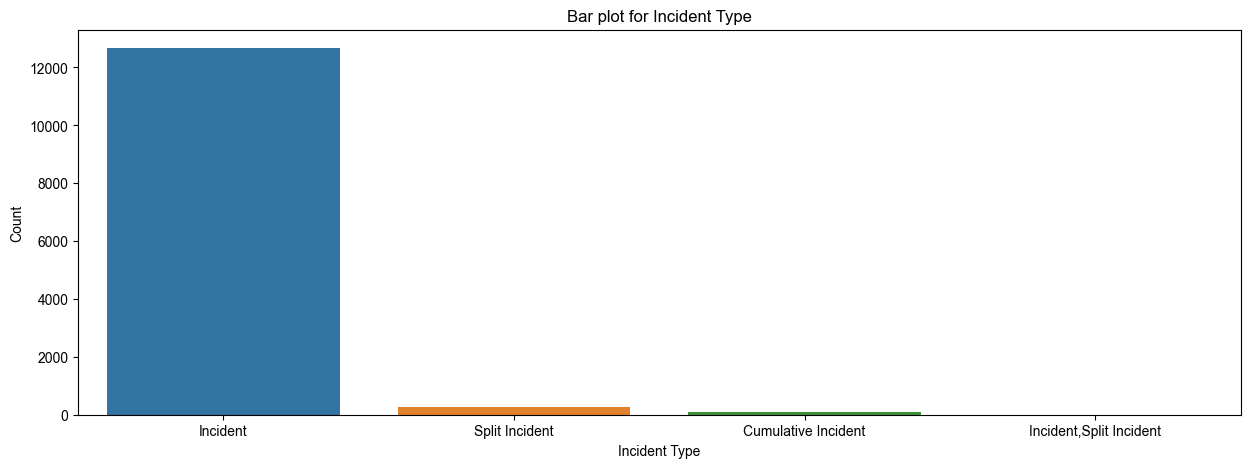

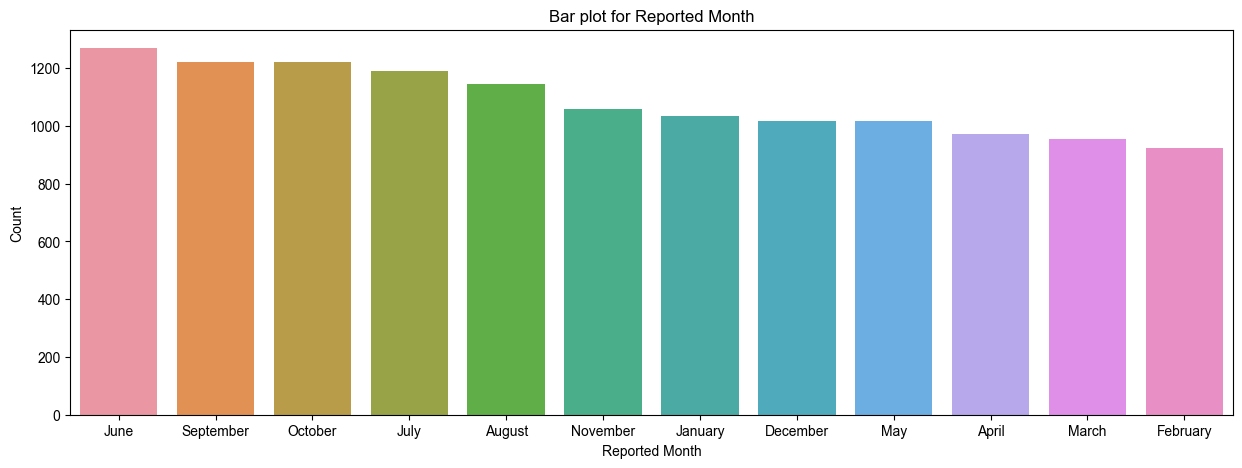

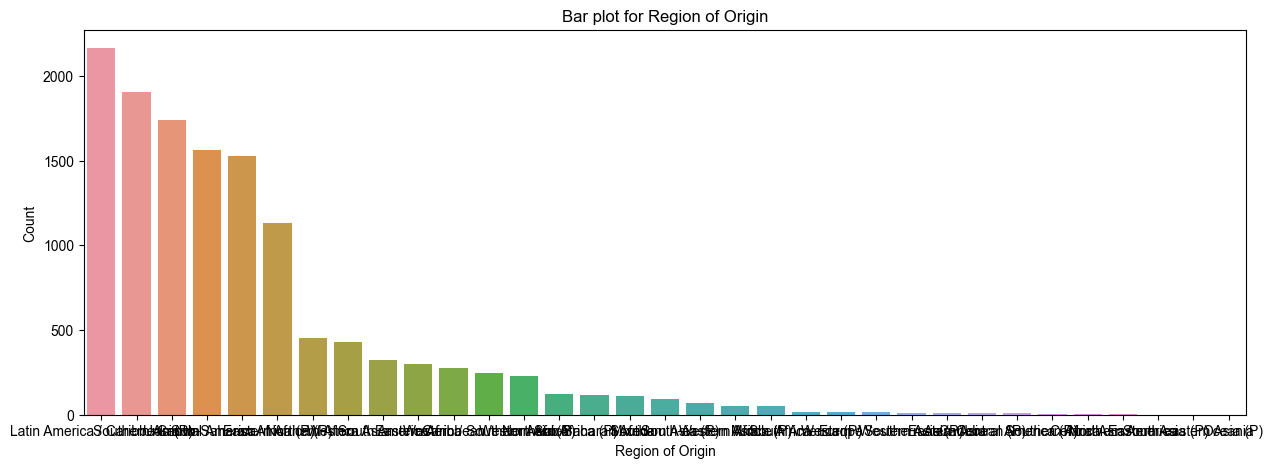

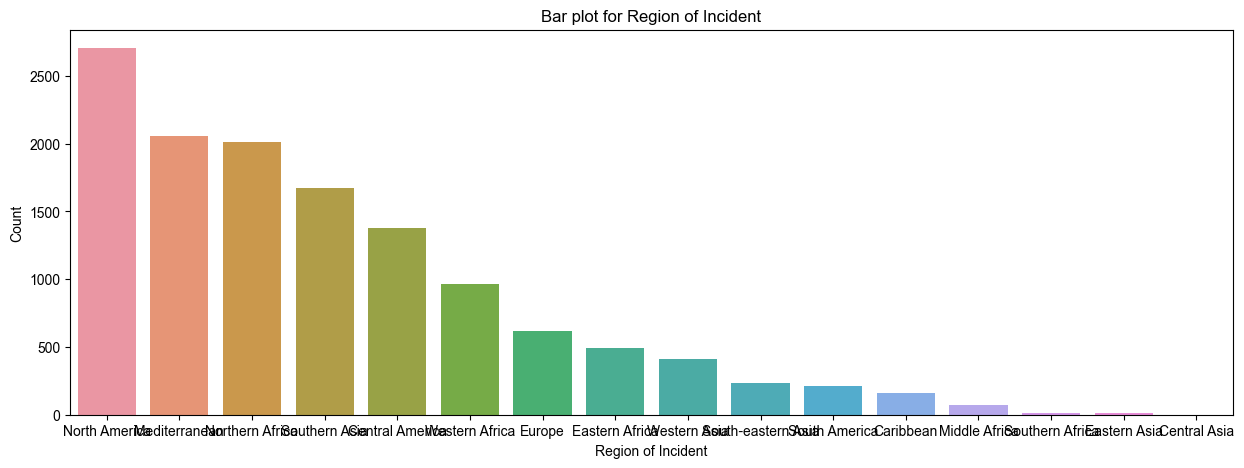

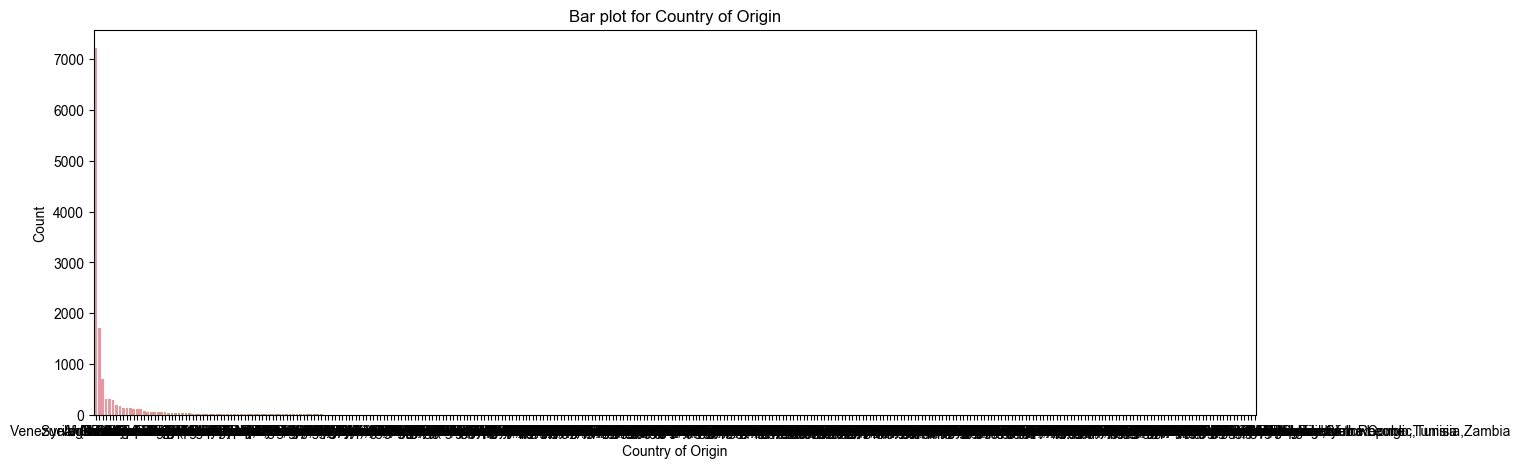

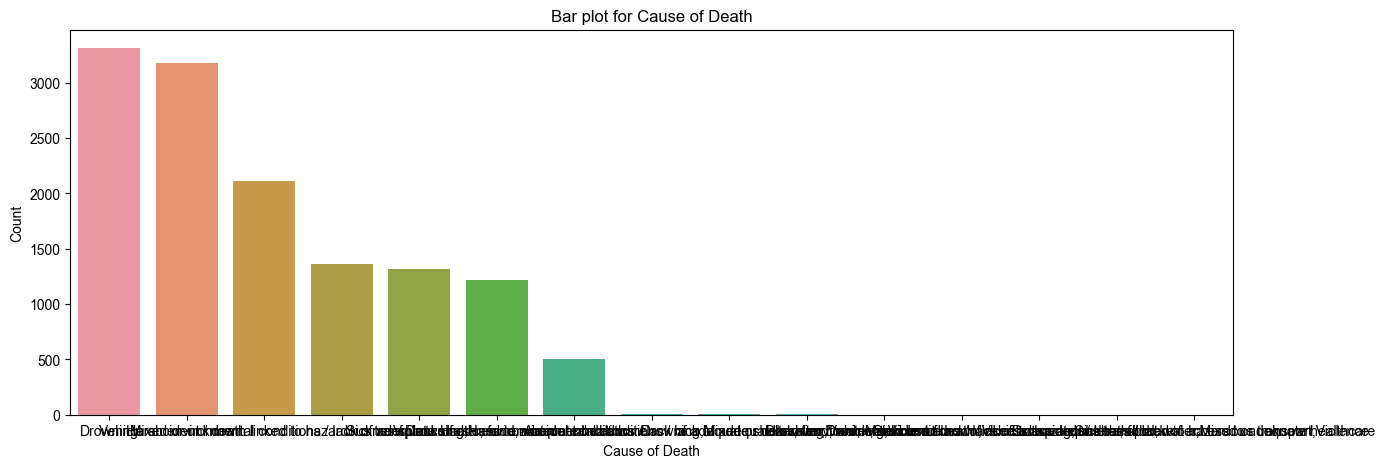

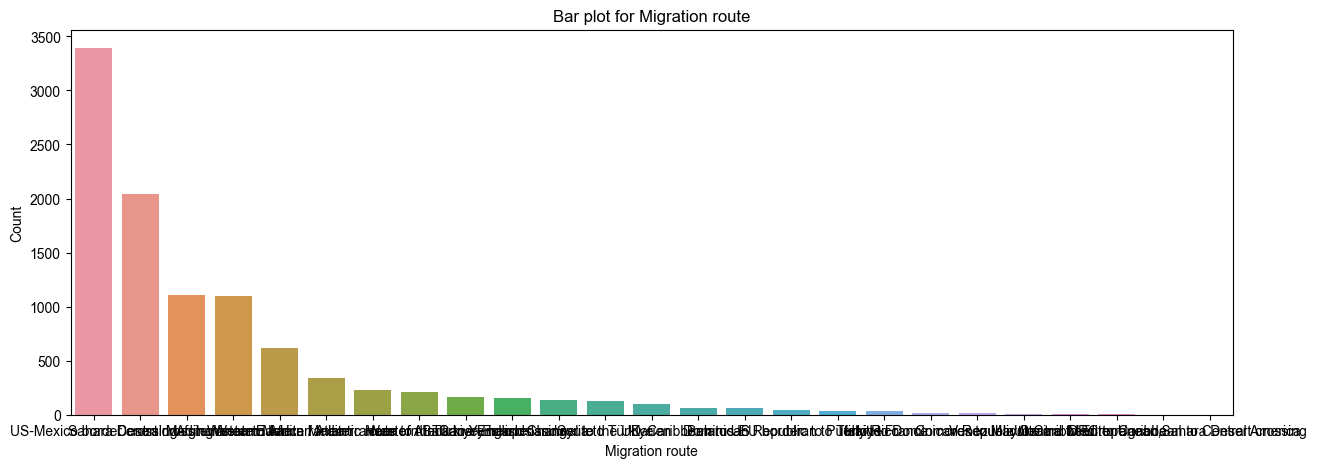

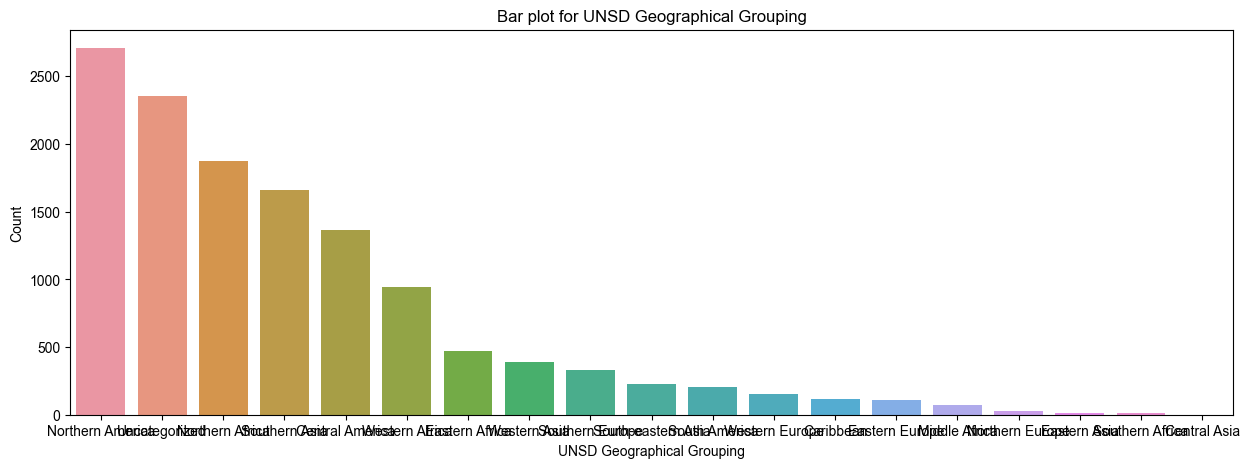

In [47]:
# Bar plot for categorical columns
col=['Incident Type', 'Reported Month', 'Region of Origin', 'Region of Incident', 'Country of Origin', 'Cause of Death',
       'Migration route', 'UNSD Geographical Grouping']
for i in col:
    if df[i].dtypes=='O':
        df0=df[i].value_counts().reset_index()
        plt.figure(figsize=(15, 5))
        sns.barplot(df0, x=df0['index'], y=df0.columns[1])
        plt.title(f'Bar plot for {i}')
        plt.xlabel(i)  
        plt.ylabel('Count')  
        plt.show()

In [12]:
# Handling null values
# Using mode
col1=['Region of Origin','Country of Origin','Information Source','UNSD Geographical Grouping']   # fillna with mode
for i in col1:
    df[i]=df[i].fillna(df[i].mode()[0])
    
# Droping null
col2=['Coordinates']     # dropna
df['Coordinates'].dropna(inplace=True)  # (as mode might not works bec location cant be generalised)  ---ask--- not working-----

# Using median
col3=['Number of Dead']  # fillna with median
df['Number of Dead']=df['Number of Dead'].fillna(df['Number of Dead'].median())

# Filling with unknown
col4=['Migration route']  # fillna with Unknown
df['Migration route'] = df['Migration route'].fillna('Missing')

In [13]:
df[df['Coordinates'].isna()].head(2)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping
231,Incident,2014,October,Unknown,Mediterranean,Unknown,0.0,20,20,93,0,0,0,Drowning,Central Mediterranean,off the coast of Libya,Mail Online and IOM Rome,NaN,Uncategorized
256,Incident,2014,January,Latin America / Caribbean (P),North America,Unknown,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,NaN,Northern America


In [15]:
# 4.	Calculate the summary statistics for numeric columns (e.g., Number of Dead, Number of Survivors).
df.describe()

,Incident year,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children
count,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,2019.060753,2.555146,1.904378,4.417281,6.553763,0.458372,1.116052,0.238095
std,2.418738,9.526058,15.645297,19.950630,42.315444,2.853658,3.811134,2.417196
min,2014.000000,0.000000,-2.000000,1.000000,-2.000000,0.000000,0.000000,0.000000
25%,2017.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,2021.000000,2.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000
max,2023.000000,750.000000,750.000000,1022.000000,1950.000000,94.000000,135.000000,250.000000


In [16]:
# 5.	What is the average total number of dead and missing?
df['Total Number of Dead and Missing'].mean()

4.417281105990783

In [17]:
# 6.	Visualize the distribution of reported years.
# Yearly
df6=df['Incident year'].value_counts().reset_index()
df6.columns=['Incident year','Count']
res6=df6.sort_values('Incident year')
res6

,Incident year,Count
9,2014,296
7,2015,821
6,2016,1277
4,2017,1341
3,2018,1637
1,2019,1804
5,2020,1296
2,2021,1800
0,2022,2183
8,2023,565


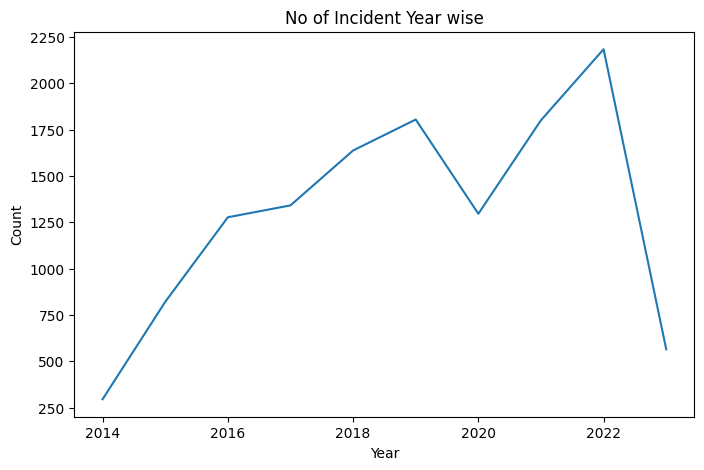

In [18]:
# Line plot
plt.figure(figsize=(8,5))
sns.lineplot(res6, x='Incident year', y='Count')
plt.title('No of Incident Year wise')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [19]:
# Monthly
df6a=df['Reported Month'].value_counts().reset_index()
df6a.columns=['Reported Month','Count']

month_order = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
    'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}

df6a['Month Order'] = df6a['Reported Month'].map(month_order)
df6a = df6a.sort_values(by='Month Order').reset_index()
df6a

,index,Reported Month,Count,Month Order
0,6,January,1035,1
1,11,February,922,2
2,10,March,954,3
3,9,April,973,4
4,8,May,1016,5
5,0,June,1269,6
6,3,July,1189,7
7,4,August,1143,8
8,1,September,1222,9
9,2,October,1222,10


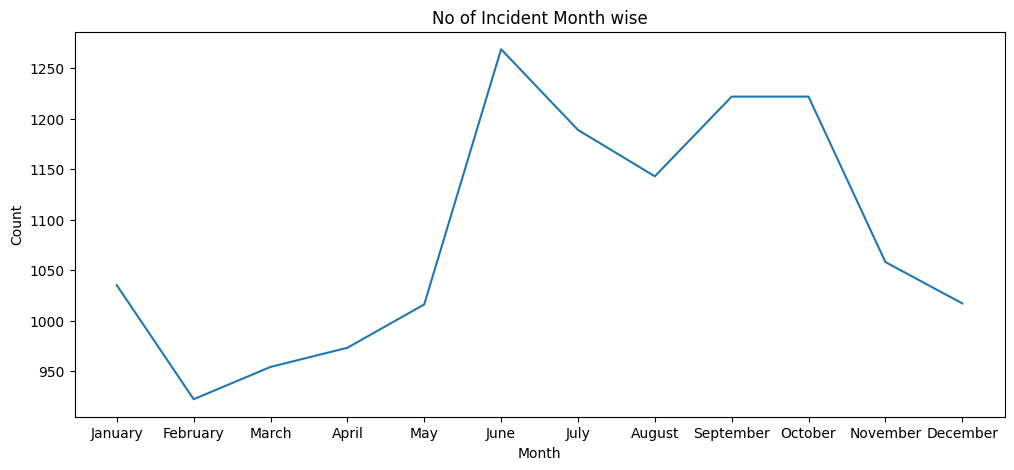

In [20]:
# Line plot
plt.figure(figsize=(12,5))
sns.lineplot(df6a, x='Reported Month', y='Count')
plt.title('No of Incident Month wise')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [21]:
# 7.	In which year did the highest number of incidents occur?
df['Incident year'].value_counts().reset_index().iloc[0,:]

index            2022
Incident year    2183
Name: 0, dtype: int64

In [22]:
# 8.	List the unique incident types in the dataset.
print(df['Incident Type'].unique())

['Incident' 'Cumulative Incident' 'Split Incident'
 'Incident,Split Incident']


In [23]:
# 9.	For each incident type, calculate the average number of survivors.
df9=df.groupby('Incident Type')['Number of Survivors'].mean().reset_index()
df9

,Incident Type,Number of Survivors
0,Cumulative Incident,5.964286
1,Incident,5.864799
2,"Incident,Split Incident",0.000000
3,Split Incident,40.314176


In [27]:
# 10.	Visualize the distribution of the number of dead.
df10=df['Number of Dead'].value_counts().reset_index().head(50)
df10.columns=['Number of Dead', 'Count']
df10.head()

,Number of Dead,Count
0,1.0,9464
1,2.0,1386
2,3.0,676
3,4.0,297
4,5.0,220


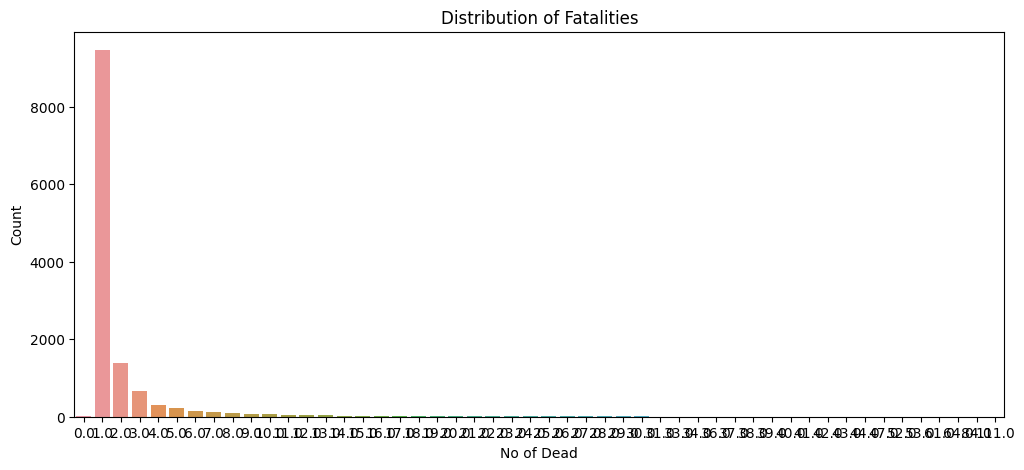

In [28]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(df10, x='Number of Dead', y='Count')
plt.title('Distribution of Fatalities')
plt.xlabel('No of Dead')
plt.ylabel('Count')
plt.show()

In [33]:
# 11.	What is the most common cause of death?
df11=df['Cause of Death'].value_counts().reset_index()
df11.columns=['Cause of Death', 'Count']
df11.head(1)

,Cause of Death,Count
0,Drowning,3313


In [38]:
# 12.	Calculate the total number of dead and missing for each region of origin.
df12=df.groupby('Region of Origin')['Total Number of Dead and Missing'].sum().reset_index()
df12

,Region of Origin,Total Number of Dead and Missing
0,Caribbean,1354
1,Caribbean (P),100
2,Central America,2101
3,Central America (P),8
4,Central Asia,68
5,Eastern Africa,2124
6,Eastern Africa (P),3756
7,Eastern Asia,58
8,Eastern Asia (P),15
9,Europe,29


In [40]:
# 13.	Identify the top 5 regions of origin with the highest total number of dead and missing.

df13=df.groupby('Region of Origin')['Total Number of Dead and Missing'].sum().reset_index()
res13=df13.sort_values('Total Number of Dead and Missing', ascending=False)
res13.head()

,Region of Origin,Total Number of Dead and Missing
26,Unknown,9456
25,Sub-Saharan Africa (P),9209
12,Mixed,7819
6,Eastern Africa (P),3756
22,Southern Asia,3540


In [41]:
# 14.	Create a new column 'month' derived from 'Reported Month' to analyze the monthly trends.

month_order = {'January': 1,'February': 2,'March': 3,'April': 4,'May': 5,'June': 6,
    'July': 7,'August': 8,'September': 9,'October': 10,'November': 11,'December': 12}

df['Month'] = df['Reported Month'].map(month_order)

In [51]:
# 15.	Calculate the total number of dead and missing for each month.
df15=df.groupby('Month')['Total Number of Dead and Missing'].sum().reset_index()
df15

,Month,Total Number of Dead and Missing
0,1,3861
1,2,3773
2,3,4230
3,4,5641
4,5,5241
5,6,5751
6,7,4732
7,8,4968
8,9,4861
9,10,4889


In [49]:
# or method-2
df15 = df.groupby('Reported Month')['Total Number of Dead and Missing'].sum().reset_index()

month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df15['Reported Month'] = pd.Categorical(df15['Reported Month'], categories=month_order, ordered=True)
df15 = df15.sort_values('Reported Month')
df15

,Reported Month,Total Number of Dead and Missing
4,January,3861
3,February,3773
7,March,4230
0,April,5641
8,May,5241
6,June,5751
5,July,4732
1,August,4968
11,September,4861
10,October,4889


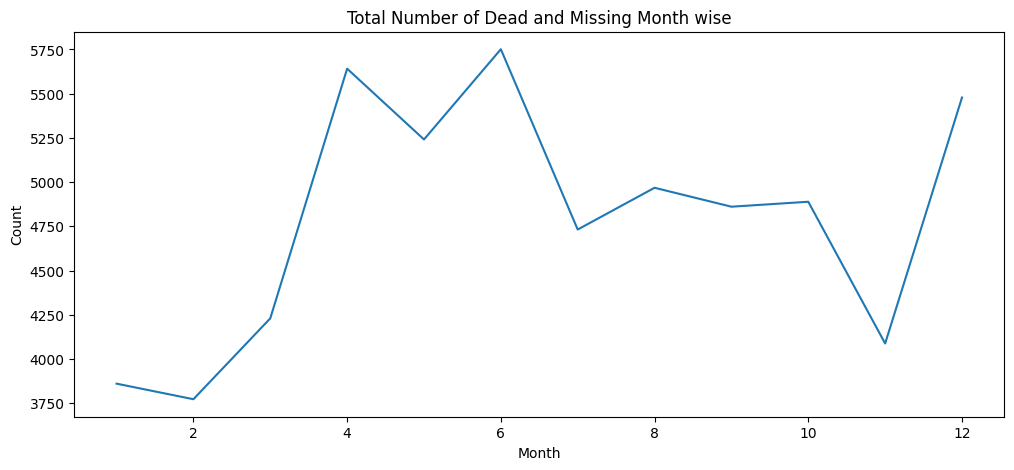

In [53]:
# 16.	Visualize the trends over months using a line plot.
# Line plot
plt.figure(figsize=(12,5))
sns.lineplot(df15, x='Month', y='Total Number of Dead and Missing')
plt.title('Total Number of Dead and Missing Month wise')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

In [56]:
# 17.	Calculate the correlation between 'Number of Dead' and 'Number of Survivors'.
df[['Number of Dead','Number of Survivors']].corr().head(1)

,Number of Dead,Number of Survivors
Number of Dead,1.0,0.096346


In [65]:
# 18.	Find the migration route with the highest number of incidents.           ---ask---

df18=df[df['Incident Type']=='Incident']
df18 = df18.groupby('Migration route')['Incident Type'].count().reset_index()
res18=df18.sort_values('Incident Type', ascending=False)
res18.head(1)

,Migration route,Incident Type
18,US-Mexico border crossing,3319


In [70]:
# or
df18 = df.groupby('Migration route')['Total Number of Dead and Missing'].sum().reset_index()
res18=df18.sort_values('Total Number of Dead and Missing', ascending=False)
res18.head(1)

,Migration route,Total Number of Dead and Missing
4,Central Mediterranean,22016


In [58]:
# or
df18 = df.groupby('Migration route')['Incident Type'].count()
route = df18.idxmax()
count = df18.max()
print(f"The migration route with the highest number of incidents is '{route}' with {count} incidents.")

The migration route with the highest number of incidents is 'US-Mexico border crossing' with 3392 incidents.


In [73]:
# 19.	Calculate the total number of incidents for each location of death.         ---ask---

df19=df[df['Incident Type']=='Incident']
df19 = df19.groupby('Location of death')['Incident Type'].count().reset_index()
res19=df19.sort_values('Incident Type', ascending=False)
res19.head()

,Location of death,Incident Type
4359,Pima Country Office of the Medical Examiner ju...,1061
4361,Pima County Office of the Medical Examiner jur...,402
4917,"Reported at Milak border crossing, Iran",200
384,"Agadez, Niger",121
5578,"Sahara desert, Libya",116


In [74]:
# or
df19 = df.groupby('Location of death')['Total Number of Dead and Missing'].sum().reset_index()
res19=df19.sort_values('Total Number of Dead and Missing', ascending=False)
res19.head()

,Location of death,Total Number of Dead and Missing
6558,Unspecified location between Libya and Italy,1589
4562,Pima Country Office of the Medical Examiner ju...,1062
57,"120 miles south of Lampedusa, 110 kilometers n...",1022
1772,"Departed from Arakan, Myanmar. Vast majority g...",750
4079,"Off the coast of Kalamata, Greece. After depar...",596


In [91]:
# or
df19 = df.groupby('Location of death')['Incident Type'].count().reset_index()
res19=df19.sort_values('Incident Type', ascending=False)
res19.head()

,Location of death,Incident Type
4562,Pima Country Office of the Medical Examiner ju...,1061
4565,Pima County Office of the Medical Examiner jur...,404
5144,"Reported at Milak border crossing, Iran",200
415,"Agadez, Niger",121
5812,"Sahara desert, Libya",116


In [95]:
# 20.	Visualize the distribution of incidents by location of death.                       ---ask---

df20 = df.groupby('Location of death')['Total Number of Dead and Missing'].sum().reset_index()
res20=df20.sort_values('Total Number of Dead and Missing', ascending=False).head(10)
res20.head()

,Location of death,Total Number of Dead and Missing
6558,Unspecified location between Libya and Italy,1589
4562,Pima Country Office of the Medical Examiner ju...,1062
57,"120 miles south of Lampedusa, 110 kilometers n...",1022
1772,"Departed from Arakan, Myanmar. Vast majority g...",750
4079,"Off the coast of Kalamata, Greece. After depar...",596


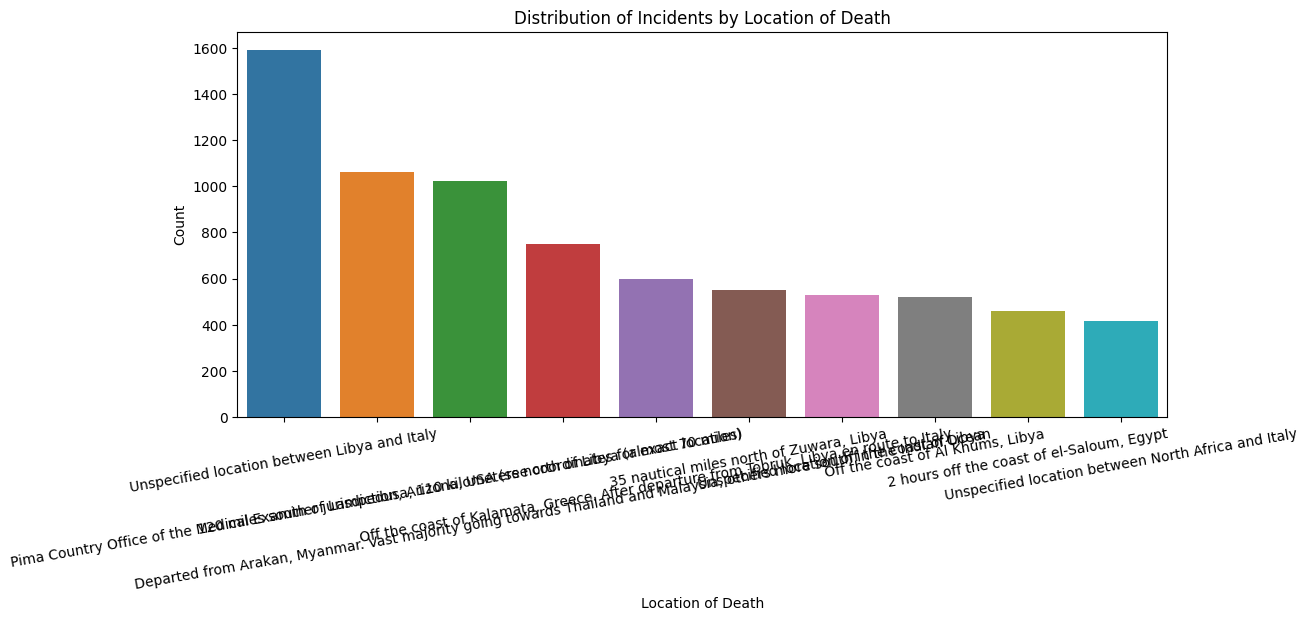

In [98]:
# Bar plot
plt.figure(figsize=(12,5))
sns.barplot(res20, x='Location of death',y='Total Number of Dead and Missing')
plt.title('Distribution of Incidents by Location of Death')
plt.xlabel('Location of Death')
plt.ylabel('Count')
plt.xticks(rotation=10)
plt.show()

In [117]:
# 21.	Identify the top 5 information sources with the highest number of incidents reported.

df21 = df.groupby('Information Source')['Incident Type'].count().reset_index()
df21.columns = ['Information Source', 'Total Incidents']
res21=df21.sort_values(by='Total Incidents', ascending=False)
res21.head()

,Information Source,Total Incidents
1616,IOM Afghanistan,1546
2784,Pima County Office of the Medical Examiner (PC...,1480
2544,Mixed Migration Monitoring Mechanism Initiativ...,1089
2543,Mixed Migration Monitoring Mechanism Initative...,992
2545,Mixed Migration Monitoring Mechanism Initiativ...,673


In [106]:
# 22.	What is the average number of males per incident type?
df22=df.groupby('Incident Type')['Number of Males'].mean().reset_index()
df22.columns = ['Incident Type', 'Average Number of Males']
df22

,Incident Type,Average Number of Males
0,Cumulative Incident,0.583333
1,Incident,1.036148
2,"Incident,Split Incident",1.200000
3,Split Incident,5.164751


In [127]:
# 23.	Find the top 3 causes of death for incidents involving children.
df23=df[df['Number of Children'] > 0]
df23=df23.groupby('Cause of Death').size().reset_index(name='Total Incidents')
res23=df23.sort_values(by='Total Incidents', ascending=False)
res23.head(3)

,Cause of Death,Total Incidents
1,Drowning,548
7,Mixed or unknown,318
10,Vehicle accident / death linked to hazardous t...,286


In [122]:
# 24.	Calculate the average total number of dead and missing for each reported year.
df24=df.groupby('Incident year')['Total Number of Dead and Missing'].mean().reset_index()
df24.columns=['Incident year','Avg no of Dead and Missing']
df24

,Incident year,Avg no of Dead and Missing
0,2014,17.976351
1,2015,8.220463
2,2016,6.325764
3,2017,4.690529
4,2018,3.059866
5,2019,3.003326
6,2020,3.318673
7,2021,3.417222
8,2022,3.234998
9,2023,5.546903


In [129]:
# 25.	Identify the top 3 UNSD Geographical Groupings with the highest total number of dead and missing.
df25=df.groupby('UNSD Geographical Grouping')['Total Number of Dead and Missing'].sum().reset_index()
df25.columns=['UNSD Geographical Grouping','Total Number of Dead and Missing']
res25=df25.sort_values(by='Total Number of Dead and Missing', ascending=False)
res25.head(3)

,UNSD Geographical Grouping,Total Number of Dead and Missing
15,Uncategorized,32229
7,Northern Africa,5708
8,Northern America,3774


In [108]:
df.head(1)

,Incident Type,Incident year,Reported Month,Region of Origin,Region of Incident,Country of Origin,Number of Dead,Minimum Estimated Number of Missing,Total Number of Dead and Missing,Number of Survivors,Number of Females,Number of Males,Number of Children,Cause of Death,Migration route,Location of death,Information Source,Coordinates,UNSD Geographical Grouping,Month
0,Incident,2014,January,Central America,North America,Guatemala,1.0,0,1,0,0,1,0,Mixed or unknown,US-Mexico border crossing,Pima Country Office of the Medical Examiner ju...,Pima County Office of the Medical Examiner (PC...,"31.650259, -110.366453",Northern America,1
